In [201]:
import pandas as pd 
import numpy as np

In [202]:
ori_df = pd.read_csv('Customer-Churn-Dataset.csv')

In [203]:
ori_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data understanding / Exploratory Data Understanding-- 

CustomerID -- unique ID,   not that important 
PaperlessBilling, OnlineBackup, StreamingTV, StreamingMovies, PaymentMethod — may be less correlated with churn- as they are more a matter a choice and preferences 
may be a combination might be useful --



Partner-- shows relationship 
Dependents -- has dependents or not like family and childeren , family guy me sticklonger 
tensure -- time period spend , longer time -- churn risk 
phoneservices -- using some phone services or not 
Contract -- contract churn type 
i think combing the low-value, medium-value, and high-value customers based on tensure and chargers can get me some result `



Cycle of the project -- 
Data Cleaning  →  EDA  →  Feature Engineering  
→  Segmentation  →  Model Building  →  Dashboard  
→  Retention Strategy  →  Feedback Loop hjb


In [204]:


df = ori_df.drop('customerID',  axis = 1)


In [205]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0}).astype(int)
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0}).astype(int)
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0}).astype(int)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
df = df.replace('No phone service', 'No')
df =  df.replace('No internet service', 'No')

C:\Users\risha\AppData\Local\Temp\ipykernel_25240\2059242664.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)
C:\Users\risha\AppData\Local\Temp\ipykernel_25240\2059242664.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\risha\AppData\Local\Temp\ipykernel_25240\2059242664.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

In [206]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

df[cols] = df[cols].replace({'Yes' :1, 'No': 0}).astype(int)

C:\Users\risha\AppData\Local\Temp\ipykernel_25240\2908788885.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({'Yes' :1, 'No': 0}).astype(int)


In [207]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [208]:
#one- hot encoding on the Internetservices, Contract, PaymentMethod 

df2 = df.copy()

#One-hot encode categorical columns
df2 = pd.get_dummies(df2, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# 3 Convert only boolean columns to integers (True → 1, False → 0)
bool_cols = df2.select_dtypes(include=['bool']).columns
df2[bool_cols] = df2[bool_cols].astype(int)


In [209]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [210]:
df3 = df2.copy()

In [211]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [212]:
df3.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [213]:
df3.dtypes


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

In [214]:
# why the datatype is object for the Total charges lets see
df3[df3['TotalCharges'].str.contains(' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,0,1,0,1,...,52.55,,0,0,0,0,1,0,0,0
753,1,0,0,1,0,1,0,0,0,0,...,20.25,,0,0,1,0,1,0,0,1
936,0,0,1,1,0,1,0,1,1,1,...,80.85,,0,0,0,0,1,0,0,1
1082,1,0,1,1,0,1,1,0,0,0,...,25.75,,0,0,1,0,1,0,0,1
1340,0,0,1,1,0,0,0,1,1,1,...,56.05,,0,0,0,0,1,1,0,0
3331,1,0,1,1,0,1,0,0,0,0,...,19.85,,0,0,1,0,1,0,0,1
3826,1,0,1,1,0,1,1,0,0,0,...,25.35,,0,0,1,0,1,0,0,1
4380,0,0,1,1,0,1,0,0,0,0,...,20.00,,0,0,1,0,1,0,0,1
5218,1,0,1,1,0,1,0,0,0,0,...,19.70,,0,0,1,1,0,0,0,1
6670,0,0,1,1,0,1,1,0,1,1,...,73.35,,0,0,0,0,1,0,0,1


In [215]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'], errors='coerce')
df3.dropna(subset=['TotalCharges'], inplace=True)
df3['TotalCharges'].isnull().sum()



np.int64(0)

In [216]:
df4 = df3.copy()

In [217]:
df4.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

In [218]:
X = df4.drop('Churn', axis =1)
y = df4.Churn

In [219]:
#train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 40)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



logr= LogisticRegression()

logr.fit(X_train, y_train)
logr.score(X_test, y_test)



0.8002842928216063

In [220]:
X_train[num_cols].describe().T[['mean', 'std']]


,mean,std
tenure,-2.479005e-17,1.000089
MonthlyCharges,1.578984e-16,1.000089
TotalCharges,1.152658e-16,1.000089


In [221]:
y_pred = logr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1050
           1       0.61      0.57      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407

[[921 129]
 [152 205]]


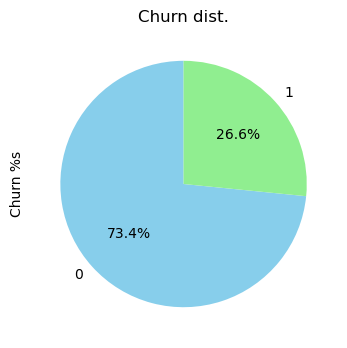

In [222]:
import matplotlib.pyplot as plt

pie_data = df4.Churn.value_counts(normalize=True)


pie_data.plot(kind='pie', autopct='%1.1f%%',
             startangle=90,   figsize =(4,4),
             colors=['skyblue', 'lightgreen'])
plt.title('Churn dist.')
plt.ylabel('Churn %s')
plt.show()

In [223]:
df5 = df4.copy()

Lets do model testing again 

In [224]:
df5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [ ]:


#cols_to_drop = ['Churn', 'StreamingMovies','StreamingTV' ,'InternetService_No','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check','PhoneService']
#got better results without dropping those columns----  again adding them 


X = df5.drop('Churn', axis =1) #features
y = df5['Churn']  #target, label

#scaling the tarin data numerical values 

num_cols1 = ['tenure', 'MonthlyCharges', 'TotalCharges']



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 30)

scaler = StandardScaler()
X_train[num_cols1] = scaler.fit_transform(X_train[num_cols1])
X_test[num_cols1] = scaler.transform(X_test[num_cols1])



In [240]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state = 30)

#training 
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion matrix:
[[933  98]
 [196 180]]

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1031
           1       0.65      0.48      0.55       376

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<function matplotlib.pyplot.show(close=None, block=None)>

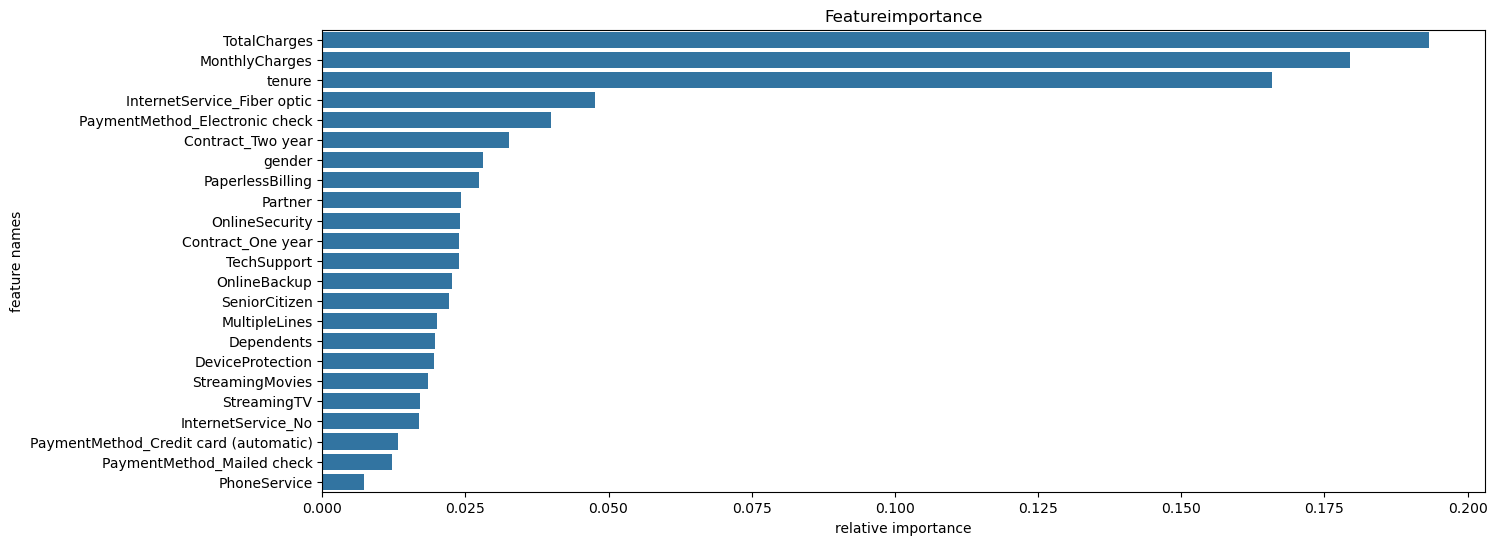

In [241]:
from numpy import indices
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = rf_model.predict(X_test)

#evalution 
print("Confusion matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nClassification Report :")
print(classification_report(y_test, y_predict))

#Feature selection
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#plot feature importance
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Featureimportance')
plt.xlabel('relative importance')
plt.ylabel('feature names')
plt.show


removing features with the importance less than 0.01  


Trying xg boost


In [228]:

df6 = df4.copy()

In [242]:
import xgboost as xgb
df6.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [243]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

xgb_for_tuning = xgb.XGBClassifier(scale_pos_weight = scale_pos, 
                                   random_state= 30, 
                                   use_label_encoder = False,
                                    eval_metric='logloss')
#this scale_pos is imp as dataset is imbalance

param_grid = {
    'n_estimators' : [100,200,300,400],
    'max_depth': [3,4,5,6],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'subsample': [0.7,0.8, 0.9, 1.0], #Bootstraping sampling -- 
    'colsample_bytree': [0.7, 0.8,0.9, 1.0] #featurebagging
}

random_search = RandomizedSearchCV(
    estimator= xgb_for_tuning, 
    param_distributions=param_grid,
    n_iter= 50,
    scoring = 'f1', #select the best f1 hyperparametre
    cv= 5,
    n_jobs = -1,
    verbose=2, #printprogress
    random_state= 30
)

random_search.fit(X_train, y_train)


#bestparams
print(f"\nbest params found: {random_search.best_params_}")
best_xgb_model =random_search.best_estimator_
# this best_xgb_model  is the new best model -----  

y_pred_tuned_xgb = best_xgb_model.predict(X_test)



#classification report 

print("\nClassification report TUNED XGBoost Model")
print( classification_report(y_test, y_pred_tuned_xgb))


#confusion matrix
print("\nConfusion matrix Tuned XGBoost model")
print(confusion_matrix(y_test, y_pred_tuned_xgb))


#ROC-AUC score

y_pred_prob_tuned = best_xgb_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test , y_pred_prob_tuned)
print(f"\nROC-AUC Score TUNED Model: {auc:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\risha\anaconda3\envs\dataenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:23:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



best params found: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Classification report TUNED XGBoost Model
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1031
           1       0.55      0.77      0.64       376

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407


Confusion matrix Tuned XGBoost model
[[790 241]
 [ 86 290]]

ROC-AUC Score TUNED Model: 0.8446


Threshold tuningg-- (F1, recall, precision), default threshold 0.50,not got for imbalanced data, now F1 -- tuning is needed as F1 balances both the precion and recall although accuracy is not needed as the dataset is imbalance -- 

In [244]:
# Get probabilities from your NEW best model
y_pred_proba_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

#threshold that givebest F1 score --- 
print("\nfinding Best Threshold for Tuned Model")

best_threshold = 0.5
best_f1 = 0
best_recall = 0
best_precision = 0

#optimizingthreshold for F1- scoree
for threshold in np.arange(0.1, 0.9, 0.01):
    y_pred_custom = (y_pred_proba_tuned >= threshold).astype(int)
    
    # f1 score 
    f1 = f1_score(y_test, y_pred_custom, pos_label=1)  #calculate bestF1 from this threshold 

    # better F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_recall = recall_score(y_test, y_pred_custom, pos_label=1)
        best_precision = precision_score(y_test, y_pred_custom, pos_label=1)

print(f" best Threshold found: {best_threshold:.2f}")
print(f"  >>>> F1-Score: {best_f1:.4f}")
print(f"  >>>> Recall: {best_recall:.4f}")
print(f"  >>>> Precision: {best_precision:.4f}")

# final evaluation with this new, optimized threshold ---
print("\ninal Report TUNED Model + OPTIMIZED Threshold")
final_predictions = (y_pred_proba_tuned >= best_threshold).astype(int) #final 0/1 predictions using the best threshold.

#final accuracyy
final_accuracy = (final_predictions == y_test).mean()  #Compare 0/1 with actual labels
print(f"Final Accuracy: {final_accuracy:.4f}")

# ROC-AUC
final_roc_auc = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"Final ROC-AUC: {final_roc_auc:.4f}")

#classification report
print("\n Classification report")
print(classification_report(y_test, final_predictions))

#confusion matrix
print("\nFinal Confusion Matrix")
print(confusion_matrix(y_test, final_predictions))



finding Best Threshold for Tuned Model
 best Threshold found: 0.52
  >>>> F1-Score: 0.6434
  >>>> Recall: 0.7606
  >>>> Precision: 0.5575

inal Report TUNED Model + OPTIMIZED Threshold
Final Accuracy: 0.7747
Final ROC-AUC: 0.8446

 Classification report
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1031
           1       0.56      0.76      0.64       376

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407


Final Confusion Matrix
[[804 227]
 [ 90 286]]


Model deployment 


In [245]:
import pickle 

with open("final_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb_model, f)

with open ("final_xgb_model.pkl" , "rb") as f:
    loaded_model = pickle.load(f)

In [246]:

import json 

with open("best_threshold.json", "w") as f:
    json.dump({"threshold": float(best_threshold)}, f)

with open("best_threshold.json", "r") as f:
    threshold_data = json.load(f)
    optimal_threshold = threshold_data["threshold"]

In [ ]:
import pandas as pd
import urllib
from sqlalchemy import create_engine

# 1. Define your connection details
server = 'localhost\\SQLEXPRESS'
database = 'ChurnDB'
driver = 'ODBC Driver 17 for SQL Server'

# 2. Create the connection string safely (using urllib to fix the space issue)
connection_string = f"DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
params = urllib.parse.quote_plus(connection_string)

# 3. Create the engine
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# 4. Export the DataFrame to SQL Server
ori_df.to_sql("CustomerRawData", engine, if_exists="fail", index=False)

print("✅ Connection established and table 'CustomerRawData' created/replaced successfully.")

✅ Connection established and table 'CustomerRawData' created/replaced successfully.


In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [280]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Attached customerid column on df7 and taken df2 encoded column 
df7 = df2.copy()
df7['customerID'] = ori_df['customerID']

print(f"initial Shape for df7 : {df7.shape}")


# Cleaning df7
df7['TotalCharges'] = pd.to_numeric(df7['TotalCharges'], errors='coerce')
df7.dropna(subset=['TotalCharges'], inplace=True)

print(f"2. Shape after cleaning: {df7.shape}")

#scaling
scaler = StandardScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

#using X_train
scaler.fit(X_train[cols_to_scale])
df7[cols_to_scale] = scaler.transform(df7[cols_to_scale])

X_input = df7.drop(columns=['customerID'])

X_input = X_input[X_train.columns]

# predicting-----./..
probs = loaded_model.predict_proba(X_input)[:, 1]
preds = (probs >= optimal_threshold).astype(int)

final_prediction_df = pd.DataFrame({
    'customerID': df7['customerID'],  # IDs come from the SAME dataframe as input
    'PredictedChurn': preds,
    'ChurnProbability': probs
})

final_prediction_df.to_sql("ChurnPredictions", engine, if_exists="replace", index=False)

print("final Predictions saved to SQL Server!")
print(final_prediction_df.head())

initial Shape for df7 : (7043, 25)
2. Shape after cleaning: (7032, 25)
final Predictions saved to SQL Server!
   customerID  PredictedChurn  ChurnProbability
0  7590-VHVEG               0          0.434293
1  5575-GNVDE               0          0.113858
2  3668-QPYBK               0          0.117009
3  7795-CFOCW               0          0.128324
4  9237-HQITU               0          0.344194


In [281]:
# Check the statistics of the probabilities you just generated
print(final_prediction_df['ChurnProbability'].describe())

count    7032.000000
mean        0.192232
std         0.125432
min         0.026399
25%         0.097748
50%         0.156893
75%         0.253994
max         0.670856
Name: ChurnProbability, dtype: float64
